# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [44]:
import pickle
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)
print(train_test_index_dict)

{'train_index': [6914, 8332, 2791, 25106, 11135, 24667, 17806, 25963, 9915, 8994, 13636, 5549, 23229, 10371, 16618, 18480, 7943, 21225, 11262, 11648, 8155, 9368, 19936, 8083, 6122, 2994, 7960, 14536, 21716, 2200, 23441, 3157, 728, 14015, 12039, 3925, 21321, 12676, 1330, 1517, 12478, 20823, 15546, 8719, 19362, 23878, 581, 22649, 4046, 25419, 14805, 14254, 18461, 21107, 7717, 20676, 17548, 22053, 13985, 17399, 13462, 21006, 11720, 14037, 15591, 16001, 16167, 8725, 22280, 16528, 14056, 14723, 11239, 13893, 22314, 8562, 19913, 25693, 11292, 9216, 25676, 10837, 11490, 5713, 10523, 14606, 5458, 23303, 19400, 11665, 21757, 17438, 1779, 12292, 25538, 20682, 26374, 26634, 2809, 18530, 19996, 9708, 2091, 6652, 3082, 16330, 26136, 17355, 21364, 14707, 18816, 19887, 15551, 19401, 24305, 8551, 20669, 16873, 25017, 8433, 23016, 4144, 14752, 6705, 18934, 21685, 11570, 5177, 12913, 5247, 7653, 18439, 22474, 18481, 8411, 4202, 221, 12734, 22048, 25358, 15688, 23672, 3713, 21706, 17599, 9192, 14679, 416

In [45]:
import pandas as pd
data = pd.read_csv('product_reviews.csv')


In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download the 'stopwords' resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
def preprocess_text(text):
    # convert text to lower-case
    text = text.lower()
    # remove punctuation marks and other non-word characters
    text = text.translate(str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))
    #remove numnbers
    words = text.split()
    text = ' '.join(word for word in words if not word.isdigit())   
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # instantiate PorterStemmer
    stemmer = PorterStemmer()
    # apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text


In [48]:
data['text'] = data['text'].apply(preprocess_text)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer


In [50]:
train_indices=train_test_index_dict['train_index']
test_indices=train_test_index_dict['test_index']

# Split the data into train and test sets
train_data = data.loc[train_indices]
test_data = data.loc[test_indices]

#Extracting the features and labels  from the train and test data
X_train = train_data['text']
Y_train = train_data['stars']
X_test = test_data['text']
Y_test = test_data['stars']
print("Before Vectorizer  ")
print(X_train.shape)
print(X_test.shape)
vectorizer = CountVectorizer(stop_words='english')  
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)



Before Vectorizer  
(17862,)
(8799,)
(17862, 19606)
(8799, 19606)


In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

# make predictions

Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))



              precision    recall  f1-score   support

         1.0       0.73      0.74      0.74      1149
         2.0       0.47      0.08      0.14       587
         4.0       0.47      0.49      0.48      1981
         5.0       0.78      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.54      0.54      8799
weighted avg       0.69      0.70      0.68      8799



In the given classification matrix, Class 5 exhibits the highest precision, recall, and F1-Score, indicating that the model performs well in identifying instances of this class. On the contrary, Class 2 has the lowest precision, recall, and F1-Score, suggesting challenges in accurately predicting and capturing instances of this class.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_2=TfidfVectorizer(stop_words='english')
X_train_2=vectorizer_2.fit_transform(train_data['text'])
X_test_2=vectorizer_2.transform(test_data['text'])

# Train a Naive Bayes classifier
classifier_2 = MultinomialNB()
classifier_2.fit(X_train_2, Y_train)

# make predictions
Y_pred_2 = classifier_2.predict(X_test_2)
print(classification_report(Y_test, Y_pred_2))


              precision    recall  f1-score   support

         1.0       0.90      0.13      0.23      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.55      0.01      0.03      1981
         5.0       0.59      1.00      0.74      5082

    accuracy                           0.60      8799
   macro avg       0.51      0.29      0.25      8799
weighted avg       0.58      0.60      0.46      8799



C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [53]:
print(data.shape)

(26661, 3)


In the provided classification matrix, Class 5 is the best-performing class, as evidenced by its high recall of 1.00, indicating the model successfully captures all instances of this class. However, the precision for Class 5 is 0.59, suggesting some false positives.

On the other hand, Class 2 is the worst-performing class with precision and recall both at 0.00, signifying that the model struggles to accurately identify and capture instances of this class, resulting in a lack of true positives.

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [68]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)
print(embeds)

(26661, 1024)
[[ 0.50699836  0.61128891 -0.2719104  ...  1.0390445  -0.80041009
   0.73497975]
 [-0.02217656 -0.1527285  -0.55813098 ...  0.18087101  0.16279726
  -0.41220728]
 [ 0.52932245  0.60723621 -0.25953016 ...  1.0670861  -0.75681108
   0.69999683]
 ...
 [-0.05420208 -0.14062414 -0.55579591 ...  0.12184423  0.12340328
  -0.31265116]
 [-0.02863726 -0.14980018 -0.55721784 ...  0.17685497  0.16171496
  -0.39407209]
 [-0.02447684 -0.15692814 -0.55817062 ...  0.17620397  0.16273451
  -0.39889568]]


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def within_cluster_sum_of_squares(data, kmax):
    wcss = []
    iterations = []
    for k in range(2, kmax + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        iterations.append(kmeans.n_iter_)
        wcss.append(kmeans.inertia_)
    return wcss, iterations

In [57]:
kmax = 10
wcss, iterations = within_cluster_sum_of_squares(embeds, kmax)

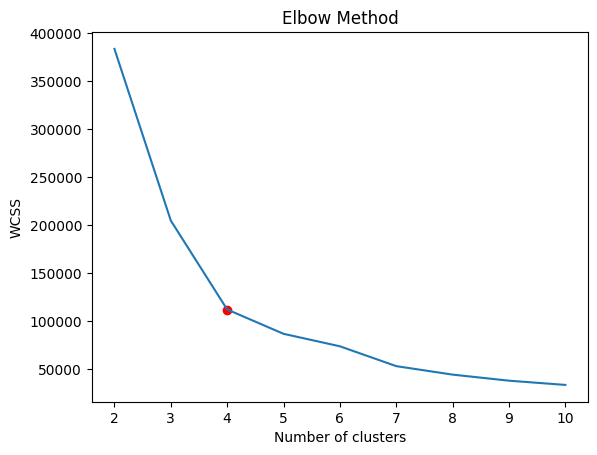

Iterations Required for each K:  [2, 3, 10, 27, 21, 21, 21, 24, 23]


In [58]:
# Plotting with integer values on the x-axis
plt.plot(range(2, kmax + 1), wcss)
plt.scatter(4, wcss[2], color='red', marker='o')  # Marking the point for k=4
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print("Iterations Required for each K: ", iterations)

In [59]:
print("Values of WCSS for different number of clusters: ",wcss)
# normalise the wcss since want to compare the values
wcss = [x / wcss[0] for x in wcss]
print("Normalised WCSS: ",wcss)



Values of WCSS for different number of clusters:  [383779.78270260454, 204916.62139984738, 112261.53167279903, 86930.52575390135, 73924.98236831193, 53239.337214216546, 44411.403062256475, 38096.02079536622, 33676.16029024752]
Normalised WCSS:  [1.0, 0.5339432420249184, 0.292515491259715, 0.22651147786298279, 0.1926234410987649, 0.13872366292799831, 0.11572105948236307, 0.09926531441310256, 0.08774865641201213]


In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def within_cluster_sum_of_squares_2(data, kmax, init_method='random'):
    wcss = []
    iterations = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters=k, random_state=42, init=init_method, n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        iterations.append(kmeans.n_iter_)
    return wcss, iterations

kmax = 10
wcss_kmeans_pp, iterations_pp = within_cluster_sum_of_squares_2(embeds, kmax, init_method='k-means++',n_init='auto')
wcss_forgy, iterations_forgy = within_cluster_sum_of_squares_2(embeds, kmax, init_method='random',n_init='auto')

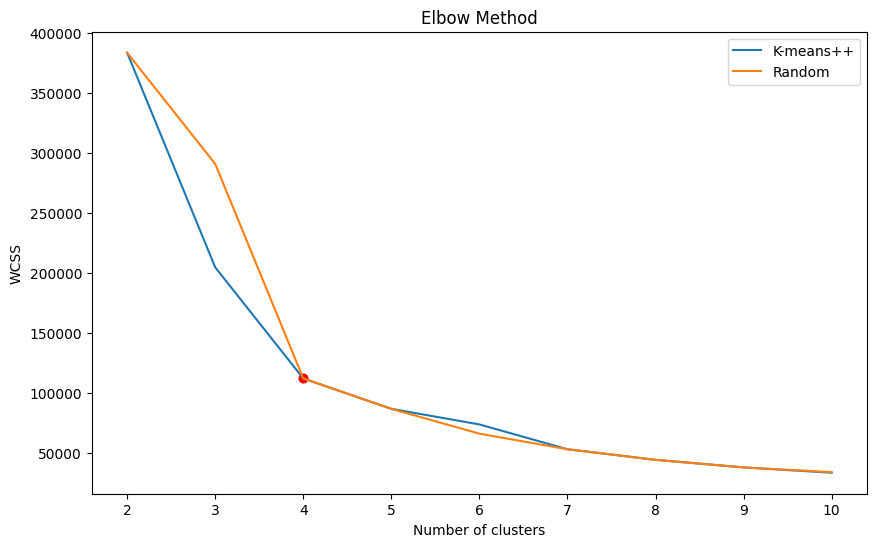

Iterations Required for each K (K-means++): [2, 3, 10, 27, 21, 21, 21, 24, 23]
Iterations Required for each K (Random): [4, 15, 15, 26, 25, 36, 36, 43, 76]


In [81]:
plt.figure(figsize=(10, 6))

# Plotting with integer values on the x-axis
plt.plot(range(2, kmax + 1), wcss_kmeans_pp, label='K-means++')
plt.scatter(4, wcss_kmeans_pp[2], color='red', marker='o')  # Marking the point for k=4
plt.plot(range(2, kmax + 1), wcss_forgy, label='Random')
plt.scatter(4, wcss_forgy[2], color='red', marker='o')  # Marking the point for k=4
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

print("Iterations Required for each K (K-means++):", iterations_pp)
print("Iterations Required for each K (Random):", iterations_forgy)

In [82]:
print(iterations_pp)

[2, 3, 10, 27, 21, 21, 21, 24, 23]


Purity : basically each cluster gets the class that is most frequent in that cluster. Formula is 
1/n * sum(max(Purity(Ci)) for i in range(1, k)) where Ci is the cluster and k is the number of clusters.
basically for each cluster you need to count maximum class vale kitne hain.
if nice clsutering then pruity will be high, tending to 1 approx



In [83]:
import numpy as np

# Example array
a = np.array([1, 3, 5, 5, 2, 5, 8])

# Find the mode (most frequently occurring element) and its count
mode = np.argmax(np.bincount(a))
count_mode = np.sum(a == mode)

print(f"Mode: {mode}, Frequency: {count_mode}")


Mode: 5, Frequency: 3


In [84]:
import numpy as np
from scipy.special import comb
# Example array
a = np.array([1, 3, 5, 5,5, 2, 5, 8])

# Find the mode (most frequently occurring element) and its count
bincount= np.bincount(a)
print(bincount)
total= comb(bincount,2)
print(total)



[0 1 1 1 0 4 0 0 1]
[0. 0. 0. 0. 0. 6. 0. 0. 0.]


In [85]:
def calculate_purity(data,k,ground_labels,cluster_assignments):
    cluster_dict = {cluster: [] for cluster in range(k)}

    for i in range(len(ground_labels)):
        cluster_dict[cluster_assignments[i]].append(ground_labels[i])
    
    # now in the dictionary corresponding to each cluster, we have the list of ground truth labels
    purity = 0
    for cluster in cluster_dict:
        cluster_labels = cluster_dict[cluster]
        mode = np.argmax(np.bincount(cluster_labels))
        # we for each cluster we count the number of points with maximum label
        count_mode = np.sum(cluster_labels == mode)
        purity += count_mode
    
    purity = purity / len(ground_labels)
    return purity


In [86]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++',n_init=1)
print(embeds.shape)
kmeans.fit(embeds)
cluster_assignments = kmeans.predict(embeds)
ground_labels=data['stars']
ground_labels = ground_labels.to_numpy()
# to int
ground_labels = ground_labels.astype(int)
print("Cluster Assignment",cluster_assignments.shape)
print("Grounds Label",ground_labels.shape)
print(calculate_purity(data,k,ground_labels,cluster_assignments))



(26661, 1024)
Cluster Assignment (26661,)
Grounds Label (26661,)
0.70683770301189


In [88]:
def calculate_rand_index_lengthy(true_labels, predicted_labels):
    n = len(true_labels)
    tp, tn, fp, fn = 0, 0, 0, 0

    for i in range(n):
        for j in range(i + 1, n):
            same_cluster_true = true_labels[i] == true_labels[j]
            same_cluster_predicted = predicted_labels[i] == predicted_labels[j]

            if same_cluster_true and same_cluster_predicted:
                tp += 1
            elif not same_cluster_true and not same_cluster_predicted:
                tn += 1
            elif same_cluster_true and not same_cluster_predicted:
                fn += 1
            elif not same_cluster_true and same_cluster_predicted:
                fp += 1
            print(i,j)

    rand_index = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

    return rand_index


Rand Index : 
TP: True Positive, two similar document unto the same cluster'TN: True Negative, two dissimilar documents into different clusters
FP: False Positive, two dissimilar documents into the same cluster
FN: False Negative, two similar documents into different clusters
Rand Index = (TP + TN) / (TP + FP + FN + TN)

In [89]:
import numpy as np
from scipy.special import comb
def rand_index_score(clusters, classes):
    # tp+fp is one that belong to same cluster that is simply clsuter c2
    postiives_combination = comb(np.bincount(clusters), 2)
    tp_fp= postiives_combination.sum()

    # tp+fn is one that belong to same class
    same_class = comb(np.bincount(classes), 2)
    tp_fn= same_class.sum()
    unique_clusters = np.unique(clusters)
    tp = 0
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        actual=classes[cluster_indices]
        different_class = comb(np.bincount(actual), 2)
        tp += different_class.sum()

    fp = tp_fp - tp
    fn = tp_fn - tp
    tn = comb(len(classes), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [90]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++',n_init=1)
kmeans.fit(embeds)
cluster_assignments = kmeans.predict(embeds)
ground_labels=data['stars']
ground_labels = ground_labels.to_numpy()
# to int
ground_labels = ground_labels.astype(int)
print(rand_index_score(cluster_assignments,ground_labels))

# verify from inbuilt
from sklearn.metrics import rand_score
print(rand_score(ground_labels, cluster_assignments))


0.7166146240059509
0.7166146240059509


In [79]:
def calculate_nmi(arr1, arr2):
    joint_prob_matrix = np.zeros((len(np.unique(arr1)), max(arr2) + 1))
    for i in range(len(arr1)):
        joint_prob_matrix[arr1[i], arr2[i]] += 1
    joint_prob_matrix /= len(arr1)

    marginal_prob_arr1 = np.sum(joint_prob_matrix, axis=1)
    marginal_prob_arr2 = np.sum(joint_prob_matrix, axis=0)

    # Calculate entropies without epsilon
    entropy_arr1 = -np.sum(marginal_prob_arr1 * np.log2(np.where(marginal_prob_arr1 > 0, marginal_prob_arr1, 1)))
    entropy_arr2 = -np.sum(marginal_prob_arr2 * np.log2(np.where(marginal_prob_arr2 > 0, marginal_prob_arr2, 1)))

    mutual_info = 0
    for i in range(len(np.unique(arr1))):
        for j in range(max(arr2) + 1):
            if joint_prob_matrix[i, j] > 0:
                denominator = marginal_prob_arr1[i] * marginal_prob_arr2[j]
                mutual_info += joint_prob_matrix[i, j] * np.log2(joint_prob_matrix[i, j] / denominator) if denominator > 0 else 0

    denominator = (entropy_arr1 + entropy_arr2) / 2
    nmi = mutual_info / denominator if denominator > 0 else 0
    return nmi


In [91]:
nmi_value=calculate_nmi(cluster_assignments,ground_labels)
print(nmi_value)

from sklearn.metrics import normalized_mutual_info_score
# Assuming arr1 and arr2 are your two arrays
nmi = normalized_mutual_info_score(cluster_assignments, ground_labels)

print("NMI:", nmi)


0.529952278810133
NMI: 0.529952278810134


NMI : Normalized Mutual Information, it basically calculates the mutual information between the two arrays. Say two arrays U and V then if some 1,2,3 point belong to one cluster in array U and 4th point belong to other cluster , then in V also if same trend follow we will output 1